## 자연어 토큰화하기, 전처리하기

In [1]:
# !git clone https://github.com/e9t/nsmc.git

In [2]:
import pandas as pd
data = pd.read_table('./nsmc/ratings_test.txt')

In [3]:
len(data)

50000

<Axes: >

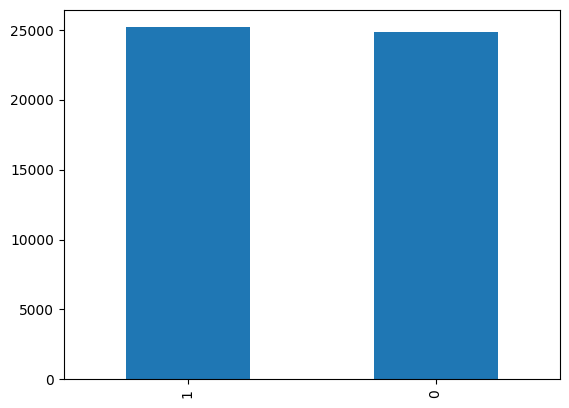

In [4]:
data['label'].value_counts().plot(kind='bar')

In [5]:
# 비어 있는 데이터 
data.isnull().sum()

id          0
document    3
label       0
dtype: int64

In [6]:
data = data.dropna(how='any')
data.isnull().sum()

id          0
document    0
label       0
dtype: int64

In [7]:
data.drop_duplicates(subset=['document'] ,
                     inplace=True)

len(data)

49157

In [8]:
'''

content_text = re.sub(r'\([^)]*\)', '', parse_text)
content_text

normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)
'''

'\n\ncontent_text = re.sub(r\'\\([^)]*\\)\', \'\', parse_text)\ncontent_text\n\nnormalized_text = []\nfor string in sent_text:\n     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())\n     normalized_text.append(tokens)\n'

In [9]:
data['document'] = data['document'].str.replace('\([^)]*\)','')
data['document'] = data['document'].str.replace('[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]','')

/var/folders/g2/tl_rhph509521kwf1sq_hlbc0000gn/T/ipykernel_98911/4278391590.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['document'] = data['document'].str.replace('\([^)]*\)','')
/var/folders/g2/tl_rhph509521kwf1sq_hlbc0000gn/T/ipykernel_98911/4278391590.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['document'] = data['document'].str.replace('[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]','')


In [10]:
import numpy as np

data['document'] = data['document'].str.replace('^ +',"")
data['document'].replace('',np.nan, inplace=True)
data.isnull().sum()

/var/folders/g2/tl_rhph509521kwf1sq_hlbc0000gn/T/ipykernel_98911/89951607.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['document'] = data['document'].str.replace('^ +',"")


id            0
document    310
label         0
dtype: int64

In [11]:
data = data.dropna(how='any')
data.isnull().sum()

id          0
document    0
label       0
dtype: int64

In [12]:
stopword = ['의', '이', '니다']

In [13]:
from konlpy.tag import Okt
#한국 형태소 분석기

In [14]:
okt = Okt()
test_sentence = '이 영화 정말 별로다 컴퓨터노트북 노트북 마이크 핸드폰 사랑해요'
okt.morphs(test_sentence , stem=True)


['이', '영화', '정말', '별로', '다', '컴퓨터', '노트북', '노트북', '마이크', '핸드폰', '사랑', '하다']

In [15]:
preprocessed_data = []
for idx , sentence in enumerate(data['document']):

    if idx % 500 == 0:

        print(idx)
    #텍스트를 형태소 단위로 나누고 정규화한다. ex) 찍어야지 -> 찍다.
    tokenized_sentence = okt.morphs(sentence , stem=True)
    com_sentence = [word for word in tokenized_sentence if not word in stopword]
    '''
    com_sentence= []
    for word in tokenized_sentence:
        if not word in stopword:
            com_sentence.append(word)
    '''
    preprocessed_data.append(com_sentence)


0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000
21500
22000
22500
23000
23500
24000
24500
25000
25500
26000
26500
27000
27500
28000
28500
29000
29500
30000
30500
31000
31500
32000
32500
33000
33500
34000
34500
35000
35500
36000
36500
37000
37500
38000
38500
39000
39500
40000
40500
41000
41500
42000
42500
43000
43500
44000
44500
45000
45500
46000
46500
47000
47500
48000
48500


In [16]:
preprocessed_data[:10]

[['굳다', 'ㅋ'],
 ['뭐',
  '야',
  '평점',
  '들',
  '은',
  '나쁘다',
  '않다',
  '점',
  '짜다',
  '리',
  '는',
  '더',
  '더욱',
  '아니다'],
 ['지루하다', '않다', '완전', '막장', '임', '돈', '주다', '보기', '에는'],
 ['만',
  '아니다',
  '별',
  '다섯',
  '개',
  '주다',
  '왜',
  '로',
  '나오다',
  '제',
  '심기',
  '를',
  '불편하다',
  '하다'],
 ['음악', '주가', '되다', '최고', '음악', '영화'],
 ['진정하다', '쓰레기'],
 ['마치',
  '미국',
  '애니',
  '에서',
  '튀어나오다',
  '한',
  '창의력',
  '없다',
  '로봇',
  '디자인',
  '부터가',
  '고개',
  '를',
  '젖다',
  '하다'],
 ['갈수록',
  '개판',
  '되다',
  '중국영화',
  '유치하다',
  '내용',
  '없다',
  '폼',
  '잡다',
  '끝나다',
  '말',
  '도',
  '안되다',
  '무기',
  '에',
  '유치하다',
  '남무',
  '아',
  '그리다',
  '동사서독',
  '같다',
  '영화',
  '가',
  '이건',
  '류',
  '아',
  '류작',
  '이다'],
 ['이별', '아픔', '뒤', '에', '찾아오다', '새롭다', '인연', '기쁨', '모든', '사람', '그렇다', '않다'],
 ['괜찮다', '오랜', '만', '포켓몬스터', '잼밌', '어', '요']]

In [17]:
# 정수 인코딩

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


2023-03-13 14:08:48.355341: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
#단어를 vetor로 토크나이즈드
tokenizer = Tokenizer()

In [19]:
tokenizer.fit_on_texts(preprocessed_data)

In [20]:
# 단어의 갯수(유니크한)
len(tokenizer.word_index)

26743

In [21]:
tokenizer.word_index

{'영화': 1,
 '보다': 2,
 '하다': 3,
 '에': 4,
 '가': 5,
 '을': 6,
 '도': 7,
 '들': 8,
 '는': 9,
 '를': 10,
 '은': 11,
 '없다': 12,
 '이다': 13,
 '있다': 14,
 '좋다': 15,
 '너무': 16,
 '다': 17,
 '정말': 18,
 '한': 19,
 '되다': 20,
 '재밌다': 21,
 '만': 22,
 '진짜': 23,
 '적': 24,
 '같다': 25,
 '아니다': 26,
 '로': 27,
 '으로': 28,
 '않다': 29,
 '점': 30,
 '에서': 31,
 '만들다': 32,
 '평점': 33,
 '나오다': 34,
 '연기': 35,
 '것': 36,
 '과': 37,
 '내': 38,
 '최고': 39,
 '그': 40,
 '인': 41,
 '안': 42,
 '나': 43,
 '생각': 44,
 '게': 45,
 '못': 46,
 '왜': 47,
 '스토리': 48,
 '드라마': 49,
 '사람': 50,
 '감동': 51,
 '보고': 52,
 '때': 53,
 '이렇다': 54,
 '더': 55,
 '고': 56,
 '아깝다': 57,
 '말': 58,
 '와': 59,
 '감독': 60,
 '배우': 61,
 'ㅋㅋ': 62,
 '아': 63,
 '그냥': 64,
 '내용': 65,
 '거': 66,
 '중': 67,
 '까지': 68,
 '재미있다': 69,
 '재미': 70,
 '시간': 71,
 '주다': 72,
 '요': 73,
 '자다': 74,
 '좀': 75,
 '재미없다': 76,
 '뭐': 77,
 '하고': 78,
 '지루하다': 79,
 '가다': 80,
 '수': 81,
 '네': 82,
 '들다': 83,
 '쓰레기': 84,
 '사랑': 85,
 '그렇다': 86,
 '모르다': 87,
 '볼': 88,
 '싶다': 89,
 '작품': 90,
 '지': 91,
 '알다': 92,
 '다시': 93,
 '하나': 9

In [22]:
tokenizer.word_counts

OrderedDict([('굳다', 136),
             ('ㅋ', 808),
             ('뭐', 1176),
             ('야', 505),
             ('평점', 2206),
             ('들', 6222),
             ('은', 5366),
             ('나쁘다', 218),
             ('않다', 2552),
             ('점', 2527),
             ('짜다', 316),
             ('리', 104),
             ('는', 5719),
             ('더', 1508),
             ('더욱', 94),
             ('아니다', 2659),
             ('지루하다', 1157),
             ('완전', 812),
             ('막장', 228),
             ('임', 699),
             ('돈', 696),
             ('주다', 1275),
             ('보기', 550),
             ('에는', 354),
             ('만', 2969),
             ('별', 632),
             ('다섯', 36),
             ('개', 695),
             ('왜', 1702),
             ('로', 2639),
             ('나오다', 2166),
             ('제', 491),
             ('심기', 1),
             ('를', 5483),
             ('불편하다', 103),
             ('하다', 13602),
             ('음악', 390),
             ('주가', 16),
          

In [23]:
# 단어 등장 횟수
tokenizer.word_counts
# 몇번 등장한 단어까지를 인정 할 것 인지?
# 분석 해보자!

threshold = 2 # 실험 변수
total_word_count = len(tokenizer.word_index) # 총 단어의 갯수(유니크 한)
total_freq = 0 # 총 단어의 갯수(중복 포함)
small_data_count = 0 #실험 변수 보다 작은 데이터의 갯수
small_data_freq = 0


for key , value in tokenizer.word_counts.items():
    total_freq += value
    '''
     ('이제껏', 7),
             ('이번', 105),
             ('계기', 37),
             ('간만', 118),
             ('필요하다', 143),
             ('아마', 44),
             ('법무관', 1),
             ('또는', 16),
             ('법조인', 4),
             이제껏  이번 계기 간만 또는 
    '''

    if value < threshold:
        small_data_count += 1 # 유니크한 단어 갯수
        small_data_freq += value # 임계치 보다 적은 단어의 총 갯수

In [24]:
print(threshold)
print(total_word_count)
print(total_freq)
print(small_data_count)
print(small_data_freq)

2
26743
608881
12052
12052


In [25]:
print(total_word_count - small_data_count)

14691


In [48]:
vocab_size = 14691
#토크나이저가 학습함. 최대 14691개만 저장하겠다.
tokenizer = Tokenizer(vocab_size)
#문자데이터를 받아 리스트형태로 변환한다.
tokenizer.fit_on_texts(preprocessed_data)
print('fit_on_texts 적용', preprocessed_data[:5])
print('-----')
#단어를 숫자로 변환함.
completed_data = tokenizer.texts_to_sequences(preprocessed_data)
print('text_to_sequnces 적용', completed_data[:5])

fit_on_texts 적용 [['굳다', 'ㅋ'], ['뭐', '야', '평점', '들', '은', '나쁘다', '않다', '점', '짜다', '리', '는', '더', '더욱', '아니다'], ['지루하다', '않다', '완전', '막장', '임', '돈', '주다', '보기', '에는'], ['만', '아니다', '별', '다섯', '개', '주다', '왜', '로', '나오다', '제', '심기', '를', '불편하다', '하다'], ['음악', '주가', '되다', '최고', '음악', '영화']]
-----
text_to_sequnces 적용 [[633, 105], [77, 184, 33, 8, 11, 408, 29, 30, 295, 801, 9, 55, 874, 26], [79, 29, 104, 393, 123, 124, 72, 165, 261], [22, 26, 140, 1796, 125, 72, 47, 27, 34, 188, 10, 810, 3], [239, 3171, 20, 39, 239, 1]]


In [30]:
# 길이 없는것은 삭제하기
cnt = 0
delete_list = []
for idx, sentence in enumerate(completed_data):
    if len(sentence) == 0:
        cnt+=1
        delete_list.append(idx)
# delete_list = [ idx for idx, sentence in enumerate(completed_data) if len(sentence) == 0 
print(delete_list)

[17, 172, 2236, 2280, 2373, 2584, 3545, 3814, 4192, 4951, 5814, 6667, 6856, 8211, 8393, 8553, 8966, 8988, 10502, 10981, 11360, 12906, 12980, 13022, 13879, 14252, 14476, 14707, 15339, 15374, 15704, 15848, 17463, 17584, 17599, 17851, 19256, 19482, 21098, 21307, 21666, 21922, 23931, 24124, 24303, 24307, 25783, 27550, 28336, 28337, 29087, 30257, 30279, 30602, 30747, 30977, 31136, 31276, 32353, 33594, 33818, 34056, 34425, 35299, 35505, 35938, 36386, 36928, 37027, 38551, 38717, 39233, 39330, 39515, 39991, 41709, 41894, 42158, 42165, 42218, 43142, 43374, 43873, 43921, 44145, 44250, 44887, 45262, 45848, 45990, 47001, 47210, 47394, 48157, 48801]


In [46]:
#왜 completed_data에 빈리스트가 생기는지 확인하기
print(preprocessed_data[172])
print(completed_data[172])

['어썸']
[]


In [44]:

for idx,value in enumerate(tokenizer.word_counts.items()):
    if value[0] == '나이스':
        print(value)
    if value[0] == '굳다':
        print(value)
    if value[0] == '어썸':
        print(value)

('굳다', 136)
('나이스', 1)
('어썸', 1)


In [29]:
finish_data = np.delete(completed_data, 
                        delete_list, axis=0)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (48847,) + inhomogeneous part.

In [ ]:
label_data = np.array(data['label'])
label_data = np.delete(label_data, 
                        delete_list, axis=0)

In [ ]:
len(finish_data),len(label_data)

NameError: name 'finish_data' is not defined

In [ ]:
# 주가 예측
# G A N
# Transformer

finish_data.shape
# 리뷰(데이터) 의 길이가  다 다르다! 
# 길이를 몇 정도로 통일하는게 좋을지 가설을 내려보자

## 리뷰 길이 구하기
len_review = []
for sentence in finish_data:
    len_review.append(len(sentence))

print(f'리뷰의 최댓값 {np.max(len_review)}')
print(f'리뷰의 평균 {np.mean(len_review)}')


NameError: name 'finish_data' is not defined

In [ ]:
import matplotlib.pyplot as plt

plt.hist(len_review)

In [ ]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import layers, models
train_data = sequence.pad_sequences(finish_data,maxlen=35)
train_data.shape


In [ ]:
x = layers.Input((35,))
h = layers.Embedding(vocab_size,128)(x)
h = layers.LSTM(128)(h)
y = layers.Dense(1, activation = 'sigmoid')(h)


In [ ]:
model = models.Model(x,y)
model.compile(loss = 'binary_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])
epochs = 3
batch_size = 32
model.fit(train_data,label_data,
          epochs=epochs,
          batch_size = batch_size,validation_split=0.2)

In [ ]:

# 정규표현식
# 토큰화
# 불용어 제거
# 숫자 인코딩
# 패딩
# 예측

import re

def sentiment_predict(sentence):
    new_sentence = re.sub(r'[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]','',sentence) # 정규 표현식
    new_sentence = okt.morphs(new_sentence , stem=True) # 토큰화 
    new_sentence = [word for word in new_sentence if not word in stopword] # 불용어 제거
    new_sentence = tokenizer.texts_to_sequences([new_sentence]) # 숫자 인코딩
    new_sentence = sequence.pad_sequences(new_sentence,maxlen=35) # 패딩
    
    result = model.predict(new_sentence)
    if result[0][0] > 0.5:
        print(f'긍정문일 확률이 {result[0][0] * 100} % 입니다')
    else:
        print(f'부정문일 확률이 {(1 - result[0][0]) * 100} % 입니다')

    






In [ ]:
sentiment_predict('가슴이 웅장해진다 이 영화 수준 실화냐?')
